<a href="https://colab.research.google.com/github/shk0349/AI_Study_24/blob/master/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분분석
- 사진이나 이미지, 동영상 등은 대체적으로 용량이 커서 보관하기 힘들기 때문에  
    주성분만 분석해서 가지고 있으면, 디스크용량 등에 이점이 있음(차원축소 알고리즘)

- 데이터가 가진 속성을 특성이라 함(사진의 특성 : R(Red) G(Green) B(Blue) K(black), A(Filter)) /
    
    과일사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있음 / 차원(dimension : 디멘션)

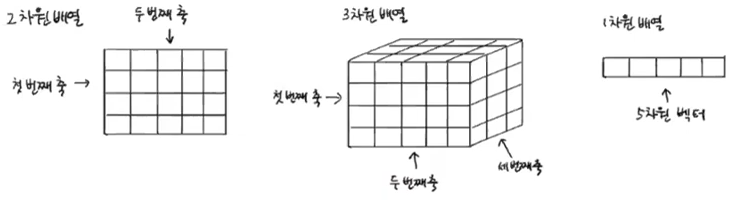

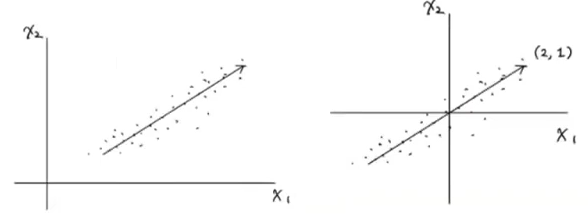

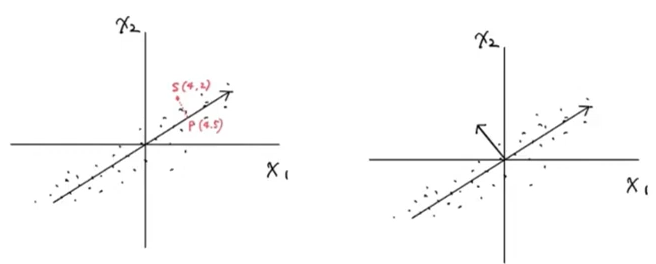

In [2]:
# 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합이 됨
# 차원축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시키기 위함
# 주성분분석(PCA : Principal Component Analysis) : 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수 있어야 함
# 참고 URL / https://ddongwon.tistory.com/114

# 주성분분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해(분산 : 데이터가 널리 퍼져있는 정도) -> 데이터를 잘 표현하는 벡터

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-01-08 05:50:58--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-08 05:50:58--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-08 05:50:59--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

from sklearn.decomposition import PCA
# sklearn decomposition의 PCA 클래스 활용 주성분분석 알고리즘 사용
pca = PCA(n_components = 50)    # PCA 클래스 생성 시 주성분의 개수를 지정
pca.fit(fruits_2d)    # 비지도학습이므로 타깃은 제외하여 학습

PCA(n_components=50)

In [4]:
print(pca.components_.shape)    # components_ : 주성분이 들어있는 속성
# 50개의 속성에 10000개(100px x 100px의 해상도)의 특성을 갖음

(50, 10000)


In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):    # ratio = 비율, 비 / 배열의 값을 이용하여 이미지로 출력해주는 매서드
    n = len(arr)    # n : 샘플개수 / 한줄에 10개씩 이미지 그림
    rows = int(np.ceil(n / 10))    # 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    cols = n if rows < 2 else 10    # 행이 1이면 열 개수는 샘플개수 / 그렇지 않으면 10개
    fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:    # n개까지만 그림
                axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
            axs[i, j].axis('off')
    plt.show()

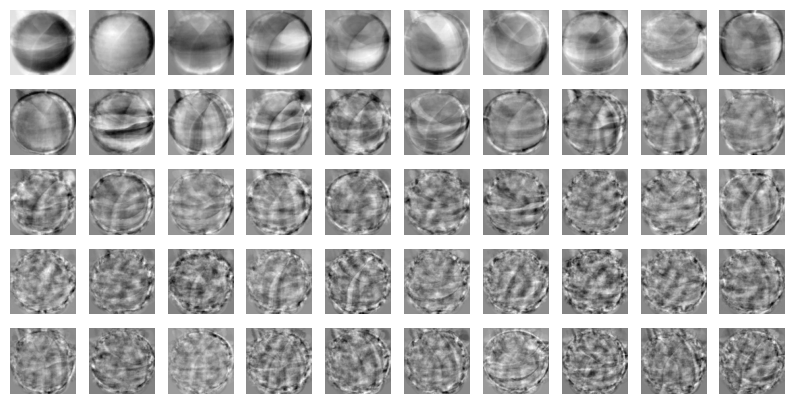

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 주성분은 원본데이터를 투영하여 특성의 개수를 만들어냄
# 이 성분은 원본데이터에서 가장 분산이 큰 방향을 순서대로 나타낸것
# 데이터셋에 있는 어떤 특징을 잡아낸 것으로 생각해도 됨

In [8]:
# 주성분을 찾았으니, 원본데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있음 -> 원본의 분해

# transform() 매서드를 사용하여 원본데이터의 차원을 줄임
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [9]:
# 10,000개의 특성을 50개로 줄였으니, 어느정도 손실이 발생함
# 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본데이터를 상당부분 재구성 가능
# 원본데이터의 재구성 -> inverse_transform()
fruits_inverse = pca.inverse_transform(fruits_pca)    # 원본처럼 재구성
print(fruits_inverse.shape)    # 50개의 특성을 원래대로(10,000개)로 복원

(300, 10000)


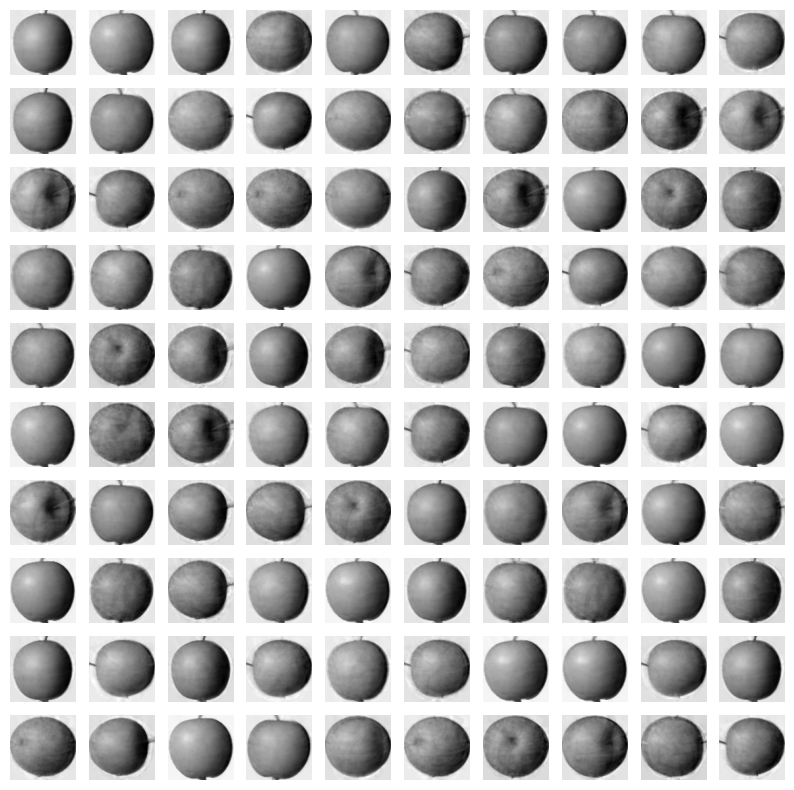

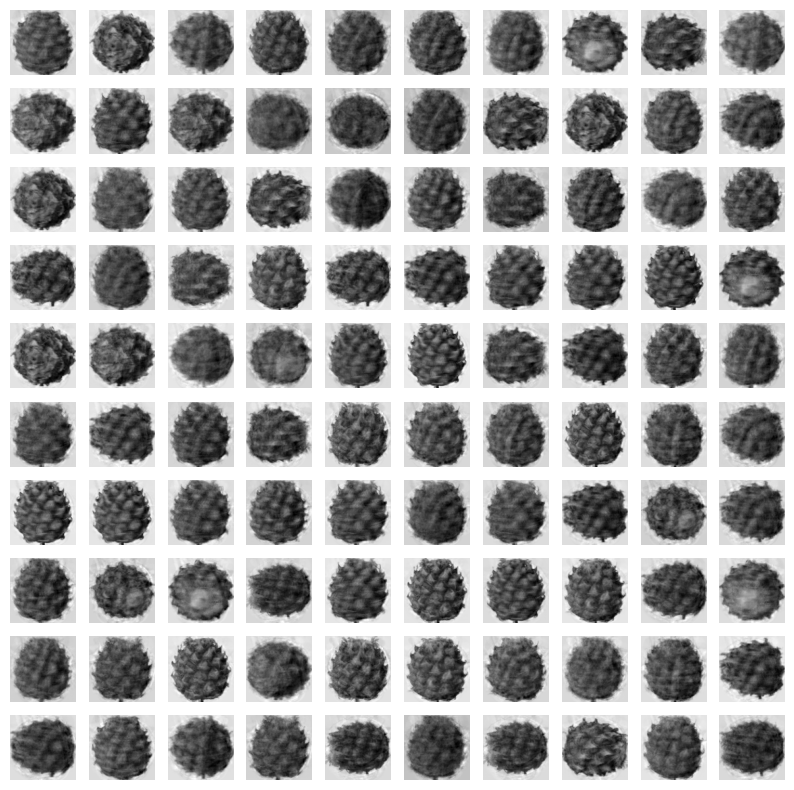

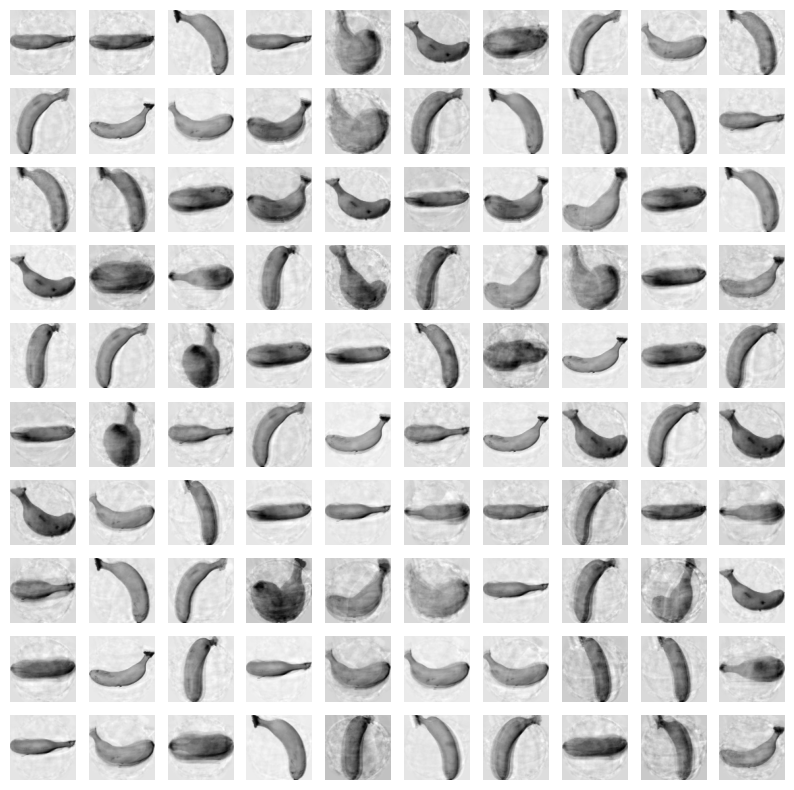

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [11]:
# 거의 모든 파일이 잘 복원된듯함 / 일부 흐리고 번진 부분도 있지만 특징을 잘 찾아낸거 같아보임
# 불과 50개의 특성을 10,000개로 늘린 것을 감안하면 성공적인듯 함
# 주 성분을 최대로 사용하였다면 완벽하게 원본 데이터를 재구성할 수 있을 것임
# 50개의 특성은 얼마나 분산을 보존하고 있을까를 확인

# 설명된분산(explained variance) : 주성분이 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# PCA 클래스의 explained_variance_ratio에 주성분의 설명된 분산 비율이 기록되어 있음
# 첫번째 주성분의 설명된 분산이 가장 큼
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))
# 92%가 넘는 분산을 유지하고 있음(이미지 품질)

0.9215026614188347


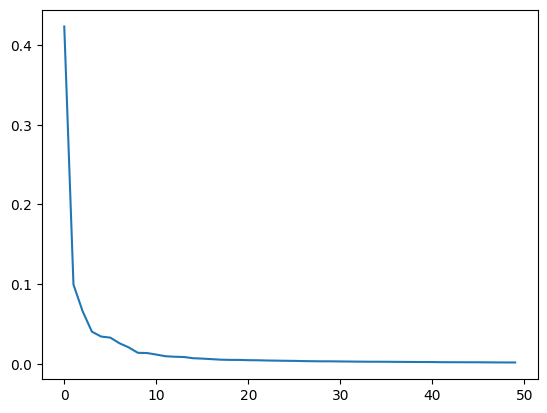

In [12]:
plt.plot(pca.explained_variance_ratio_)
# 그래프의 처음 10개가 주성분의 대부분을 표현하고 있음

In [13]:
# 위에 만든 주성분으로 지도학습모델에 적용 -> LogisticRegression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [15]:
# 지도학습 모델을 사용하기 위해 타깃을 생성 / 사과 = 0, 파인애플 = 1, 바나나 = 2
target = np.array([0] * 100 + [1] * 100 + [2] * 100)    # [0] 100개, [1] 100개, [2] 100개로 이뤄진 타깃 데이터 생성
# 파이썬 리스트에 정수를 곱하면 리스트 안의 원소를 정수만큼 반복함

In [18]:
from sklearn.model_selection import cross_validate    # cross_validate(교차검증) 사용

scores = cross_validate(lr, fruits_2d, target)    # fruits_2d 원본데이터를 사용
print(np.mean(scores['test_score']))    # 99.67%의 과대적합 / 특성이 10,000개나 되기 때문에 300개의 샘플에서는 과대적합 모델이 됨
print(np.mean(scores['fit_time']))    # 1.13초 정도 걸림

0.9966666666666667
1.1336480140686036


In [19]:
scores = cross_validate(lr, fruits_pca, target)    # fruits_pca PCA로 축소한 자료 사용
print(np.mean(scores['test_score']))    # 99.67%의 과대적합 / 원본데이터때와 동일
print(np.mean(scores['fit_time']))    # 0.014초로 빠르게 처리
# 결론 : 처리 속도가 빠르고 용량이 적음
# PCA로 훈련데이터의 차원을 축소하면 저장공간과 시간을 절약할 수 있음

0.9966666666666667
0.013917875289916993


In [20]:
# 앞에서 PCA 클래스 사용 시 n_components 매개변수에 주성분 개수를 50개로 진행하였음
# 이 대신 비율로 줄 수 있음 / ex) 50%

pca = PCA(n_components = 0.5)    # 주성분 50%(0 ~ 1 사이 실수로 입력하면 비율로 진행)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [21]:
print(pca.n_components_)    # 2개의 주성분, 2개의 특성만으로 원본데이터의 분산 50%를 표현할 수 있음

2


In [22]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)    # 300개의 요소에 2개의 주성분

(300, 2)


In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))    # 99.33%로 과대적합
print(np.mean(scores['fit_time']))    # 0.027초로 처리속도가 약간 느려짐

0.9933333333333334
0.026655864715576173


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [43]:
from sklearn.cluster import KMeans
# 차원 축소된 데이터를 사용하여 k-평균 알고리즘으로 클러스터를 찾아봄
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [45]:
print(np.unique(km.labels_, return_counts = True))
# 전에 있던 값(array([0, 1, 2], dtype=int32), array([112, 98, 90]))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


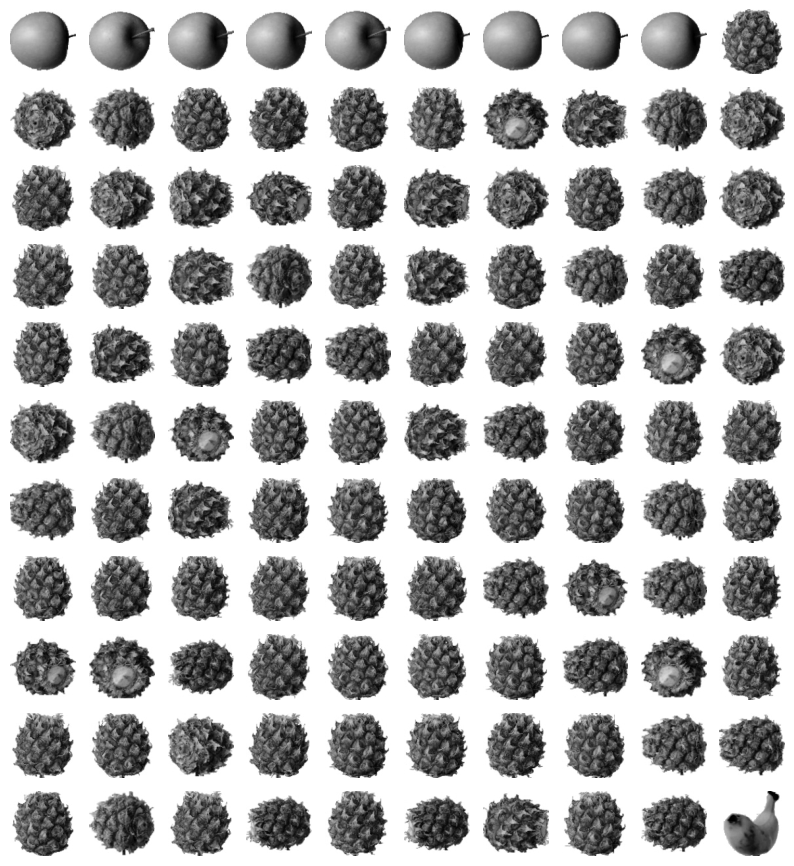

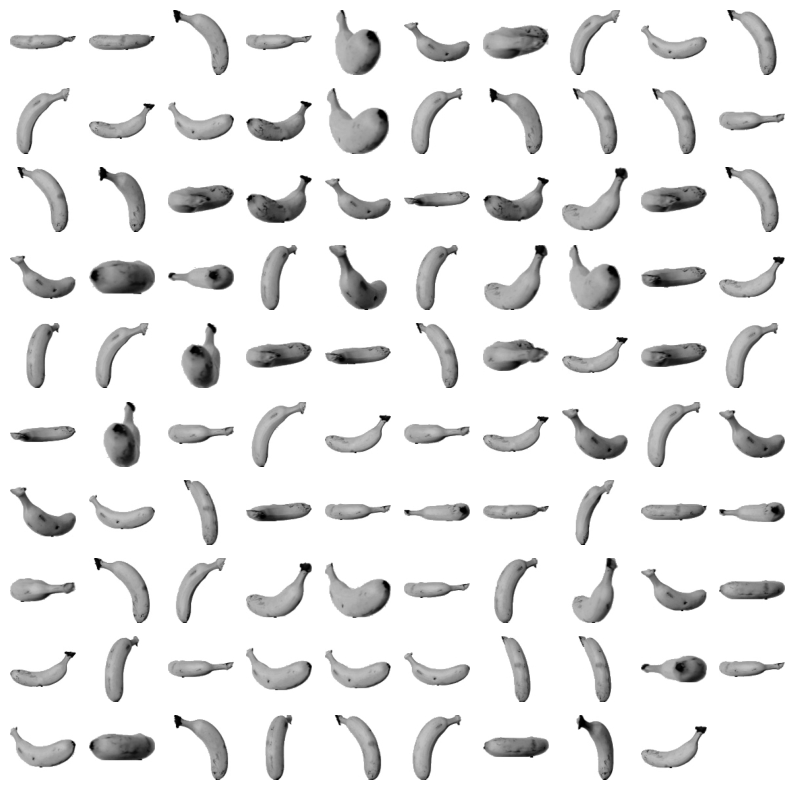

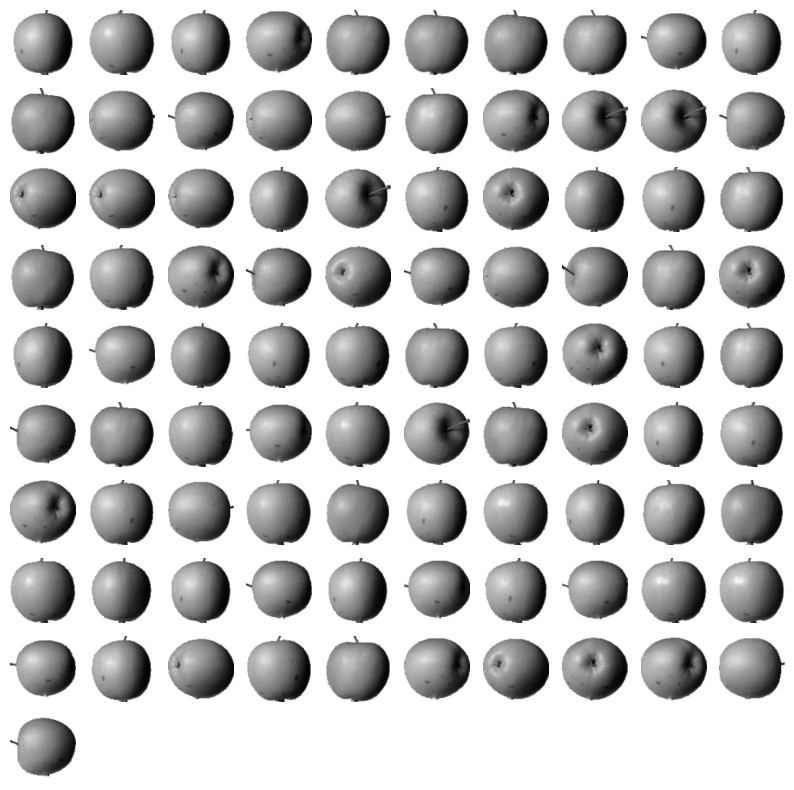

In [46]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")
# KMeans가 찾은 레이블을 사용하여 과일 이미지를 출력

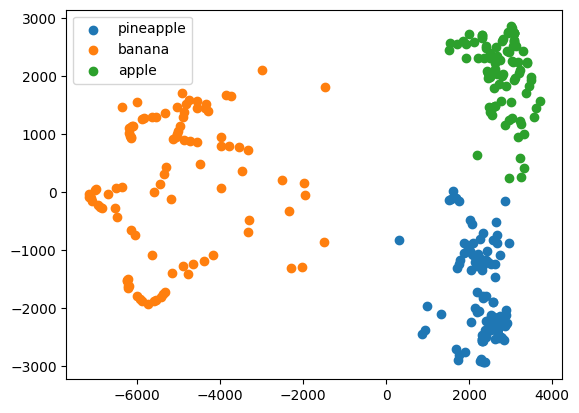

In [48]:
# 훈련데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화가 가능함
# 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움
# fruits_pca 데이터가 2개의 특성으로 있기 떄문에 2차원으로 표현할 수 있음
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]    # km.labels_를 사용하여 클러스터별로 나누어 산점도를 그림
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])    # 범례표시
plt.show()